In [105]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
from MDAnalysis.analysis.rdf import InterRDF
from MDAnalysis.analysis.rms import rmsd
import math

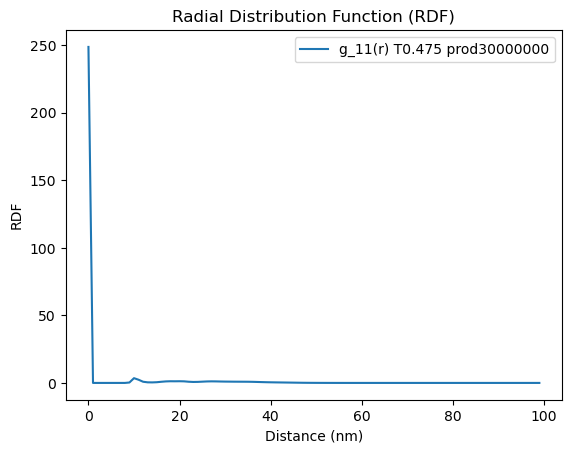

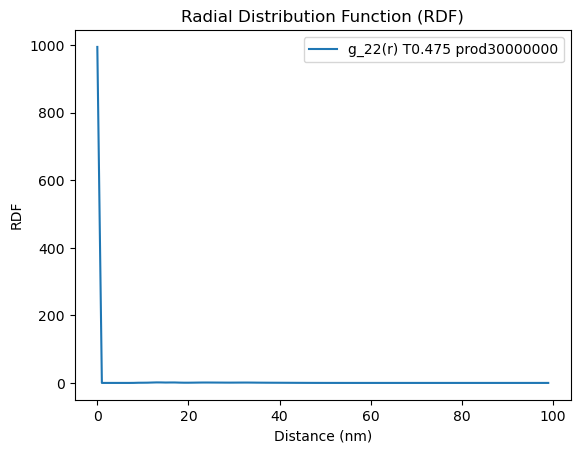

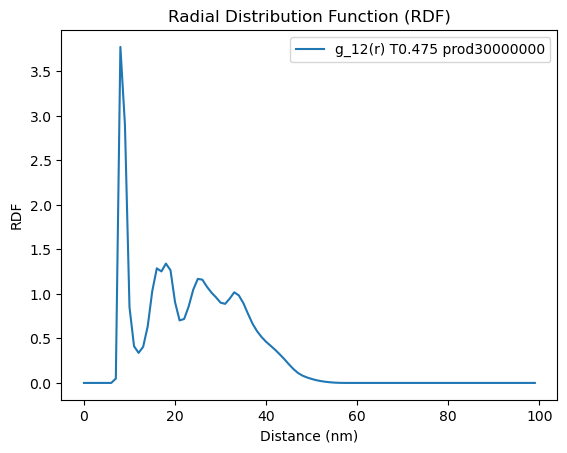

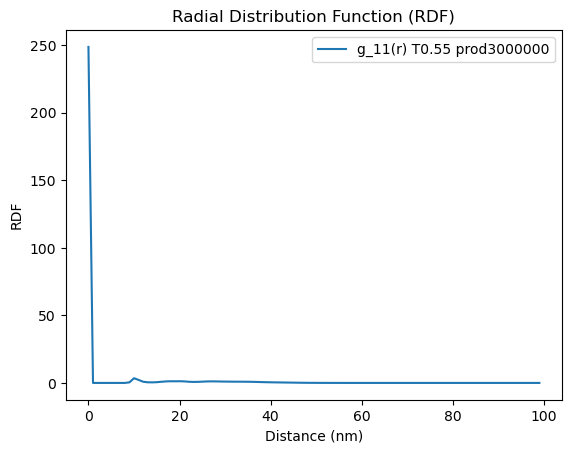

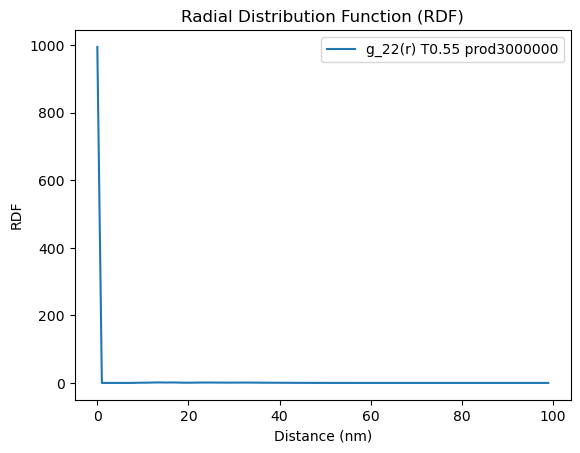

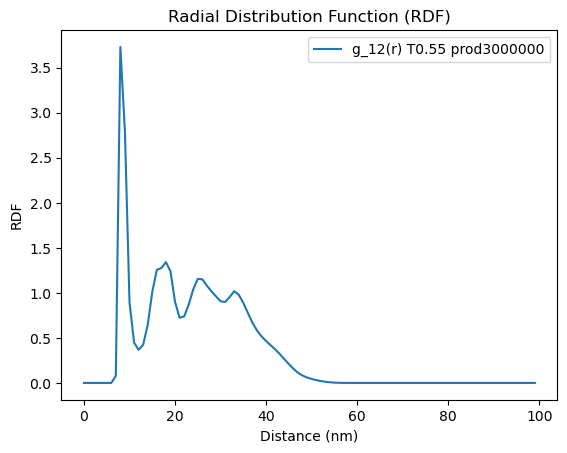

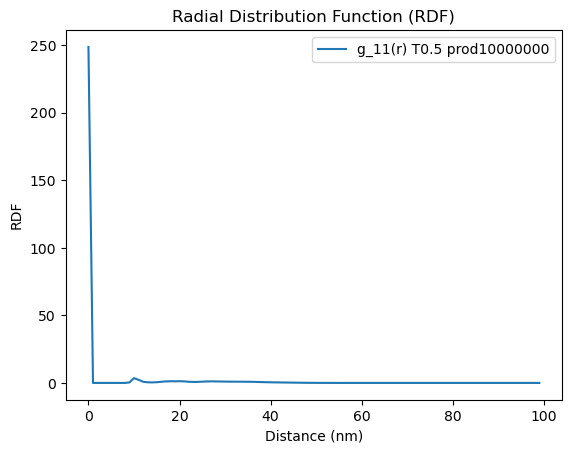

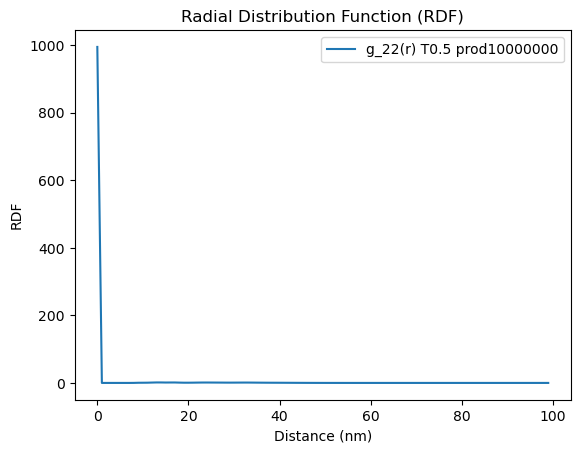

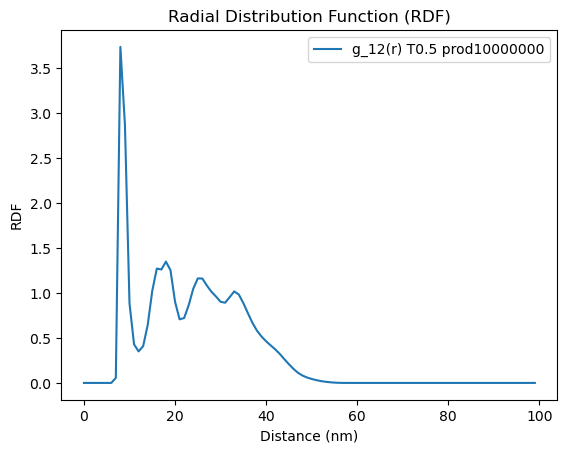

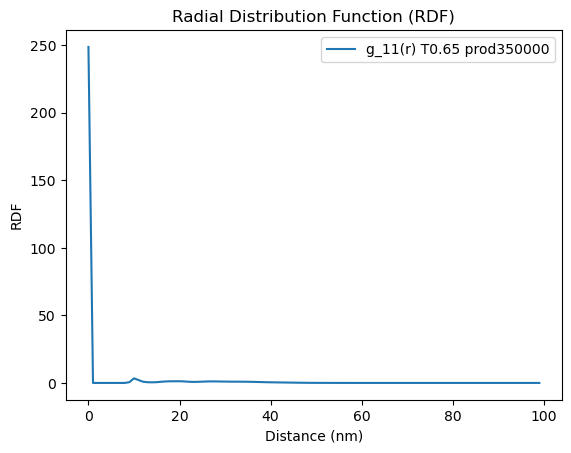

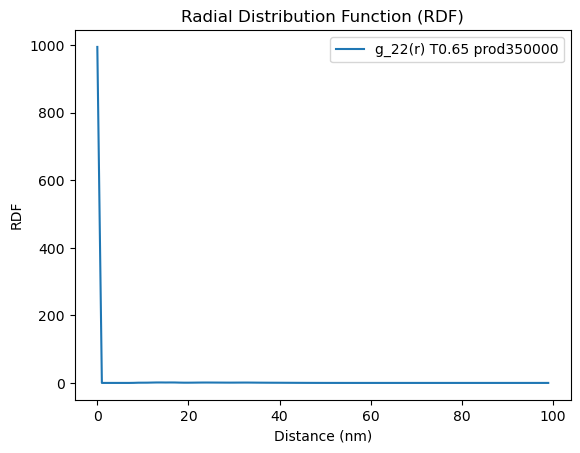

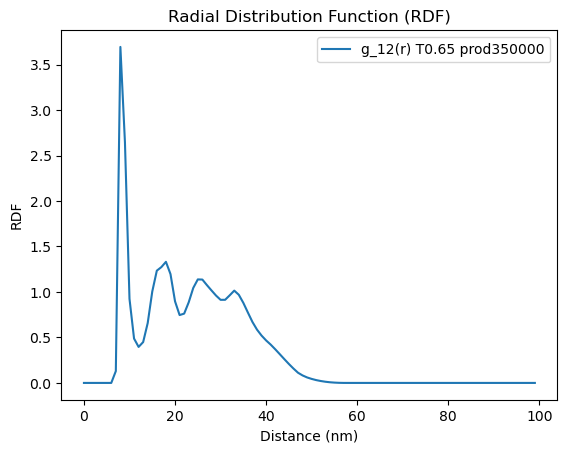

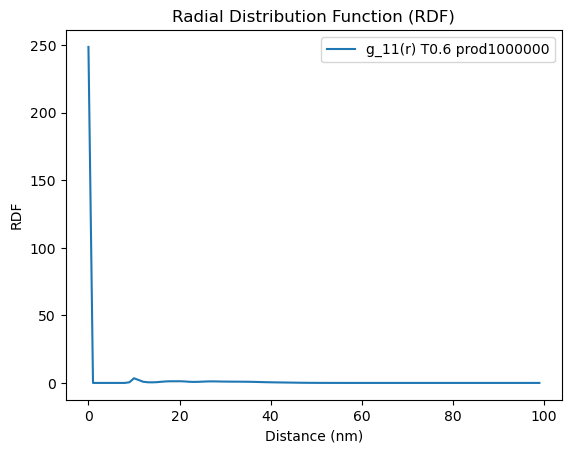

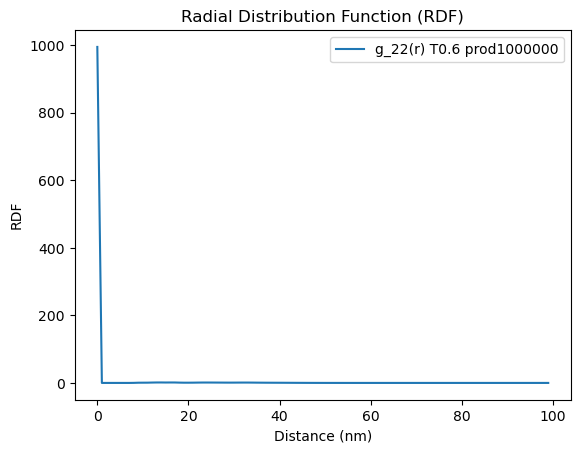

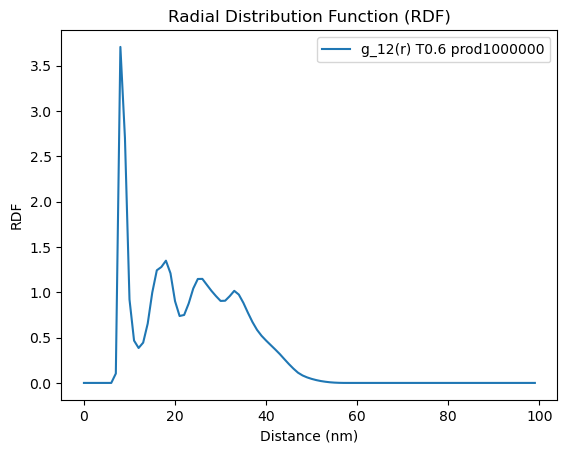

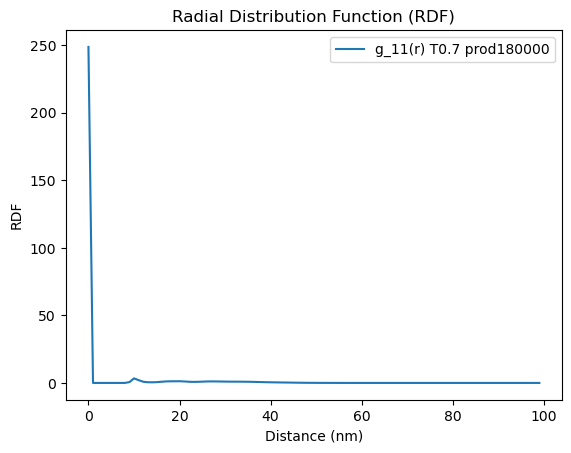

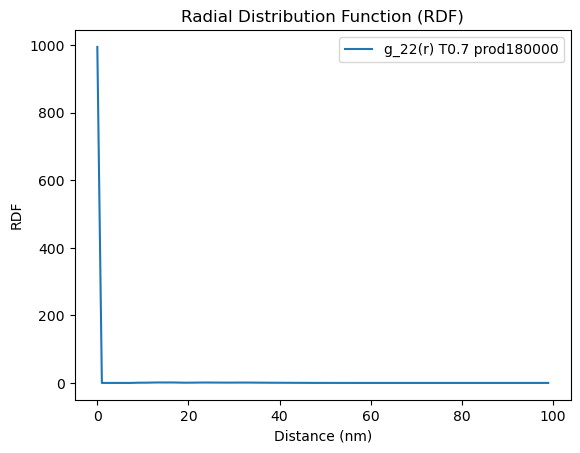

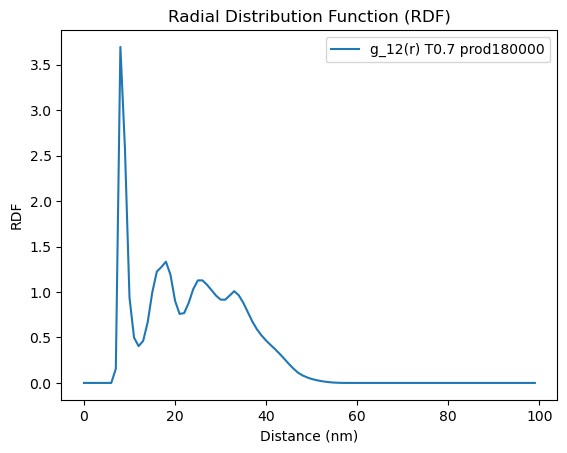

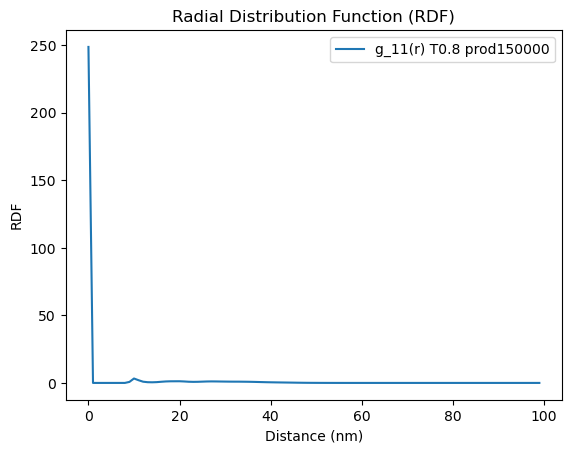

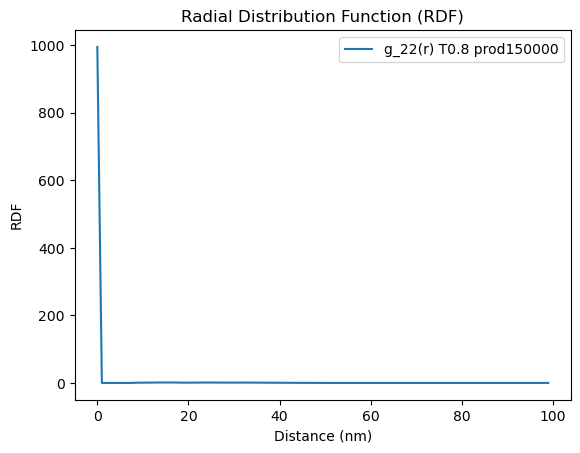

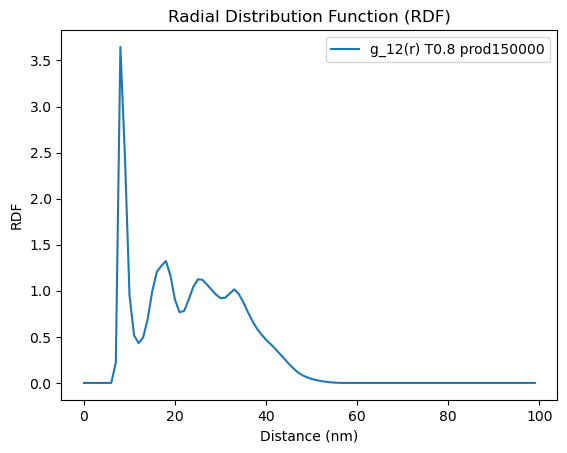

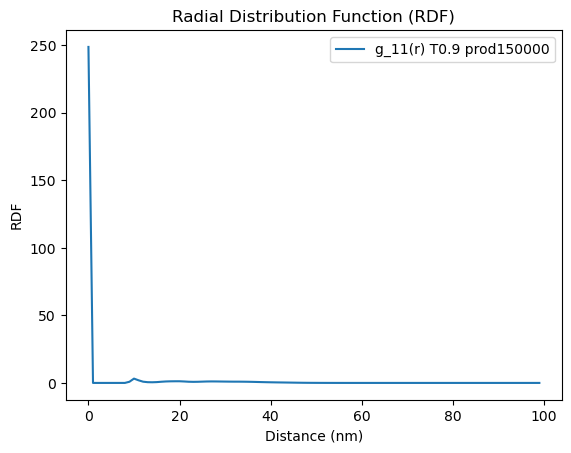

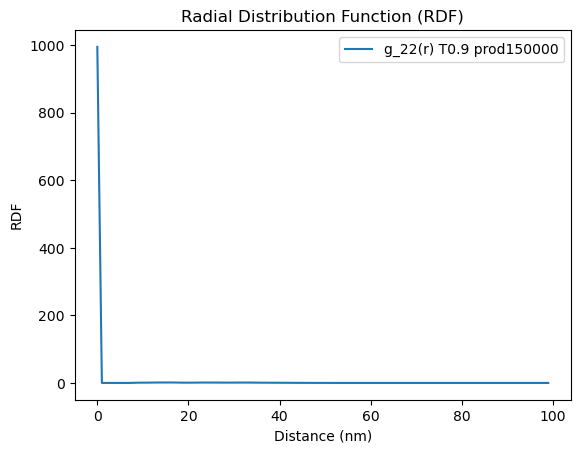

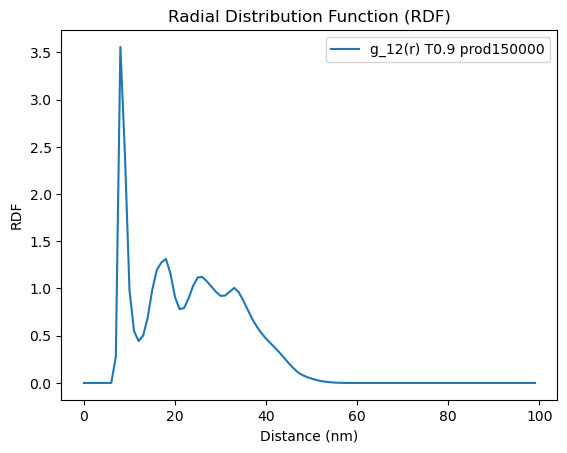

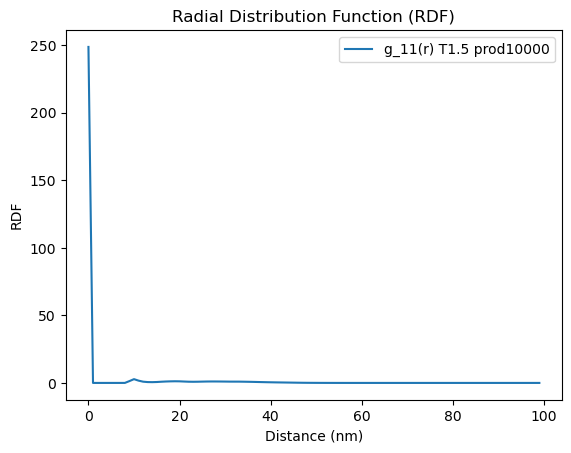

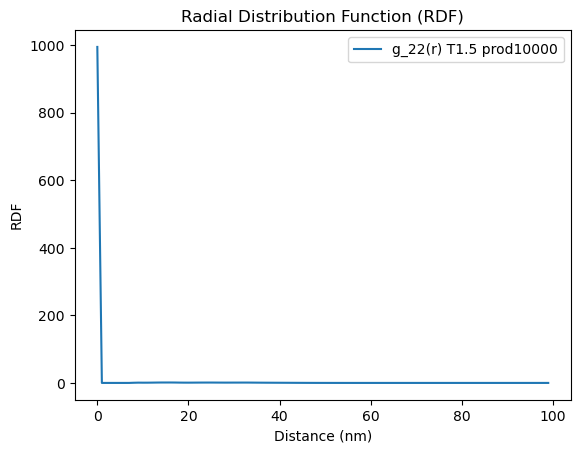

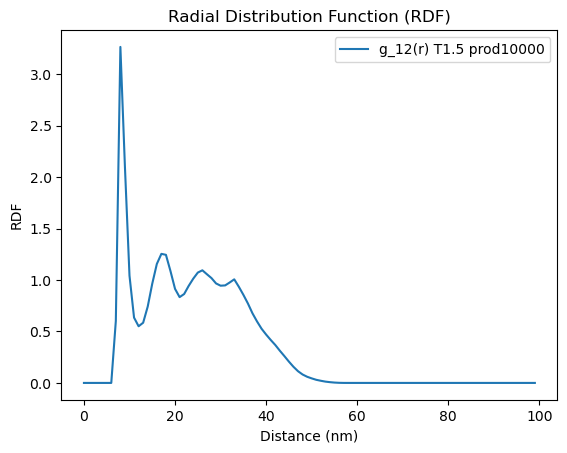

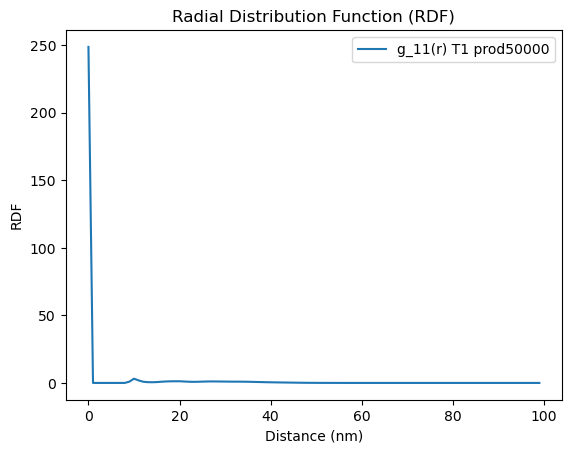

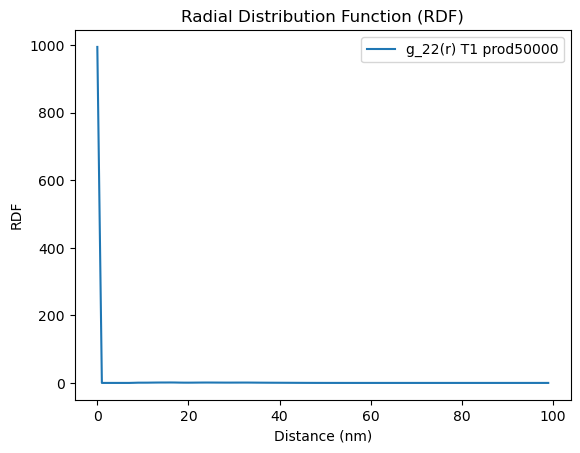

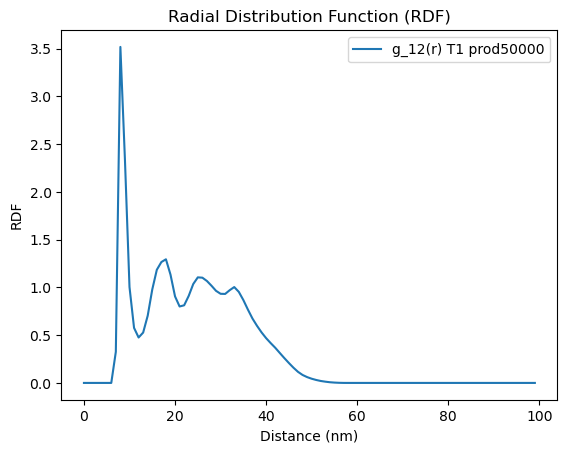

In [106]:
#rdf
def compute_rdf(traj_file, topology_file, selection1, selection2, bins=100, r_max=10.0):
    # Load trajectory and topology
    u = mda.Universe(topology_file, traj_file,topology_format="LAMMPSDUMP")

    # Select atoms for computing RDF
    atoms1 = u.select_atoms(selection1)
    atoms2 = u.select_atoms(selection2)

    # Compute RDF
    rdf = InterRDF(atoms1, atoms2, nbins=bins, range=(0, r_max))
    rdf.run()

    return rdf

def plot_rdf(rdf,label):
    plt.plot(rdf.rdf,label=label)
    plt.xlabel('Distance (nm)')
    plt.ylabel('RDF')
    plt.title('Radial Distribution Function (RDF)')
    plt.legend()
    plt.savefig('Figures/RDF/'+f'{label}.png')
    plt.show()
    
Temp=[0.475,0.55,0.5,0.65,0.6,0.7,0.8,0.9,1.5,1]
prod=[30000000,3000000,10000000,350000,1000000,180000,150000,150000,10000,50000]
i=0
for item in Temp: 
    old_traj=f'Data/equil/kalj_T{item}_n360_v300_{prod[i]}_1.lammpstrj'
    unwrapped=f'Data/prod/kalj_T{item}_n360_v300_prod_{prod[i]}_1.unwrap.dcd'
    
    rdf=compute_rdf(unwrapped,old_traj,'type 1','type 1')
    plot_rdf(rdf,'g_11(r) '+f'T{item}'+f' prod{prod[i]}')
    
    rdf=compute_rdf(unwrapped,old_traj,'type 2','type 2')
    plot_rdf(rdf,'g_22(r) '+f'T{item}'+f' prod{prod[i]}')
    
    rdf=compute_rdf(unwrapped,old_traj,'type 1','type 2')
    plot_rdf(rdf,'g_12(r) '+f'T{item}'+f' prod{prod[i]}')

    
    i+=1


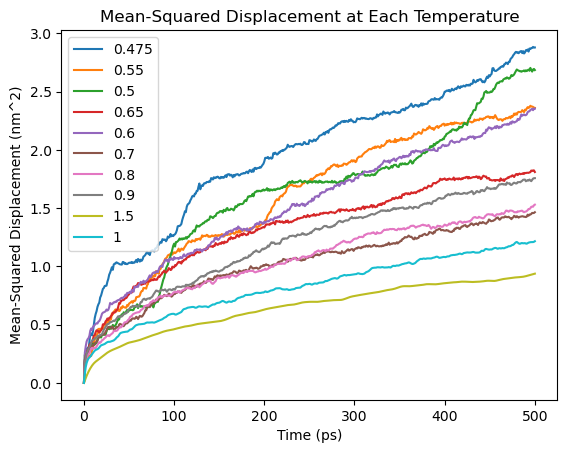

In [149]:
#MSD
def compute_msd(traj_file, topology_file, selection, start_frame=0, end_frame=None):
    # Load trajectory and topology
    u = mda.Universe(topology_file, traj_file, topology_format="LAMMPSDUMP")

    # Compute MSD for type 1 particles
    rmsd_analysis = RMSD(u, select=selection)

    # Run the RMSD calculation
    rmsd_analysis.run()

    # Access the results
    time = rmsd_analysis.rmsd[:, 0]  # Time (in frames or ps, depending on your trajectory)
    rmsd_values = rmsd_analysis.rmsd[:, 2]  # RMSD values
    
    return time,rmsd_values

def plot_msd(time,rmsd_values):
    plt.plot(time,rmsd_values,label=item)

time_at_msd_equals_1=[]
Temp=[0.475,0.55,0.5,0.65,0.6,0.7,0.8,0.9,1.5,1]
prod=[30000000,3000000,10000000,350000,1000000,180000,150000,150000,10000,50000]
i=0
for item in Temp: 
    old_traj=f'Data/equil/kalj_T{item}_n360_v300_{prod[i]}_1.lammpstrj'
    unwrapped=f'Data/prod/kalj_T{item}_n360_v300_prod_{prod[i]}_1.unwrap.dcd'
    
    time, rmsd_values=compute_msd(unwrapped,old_traj,'type 1')
    plot_msd(time, rmsd_values)
    
    
    #where is msd 1?
    dist_to_1=[]
    for item in rmsd_values:
        dist_to_1 += [abs(1-item)]
    time_at_msd_equals_1 += [dist_to_1.index(min(dist_to_1))]
    
    i+=1
    
plt.xlabel('Time (ps)')
plt.ylabel('Mean-Squared Displacement (nm^2)')
plt.legend()
plt.title('Mean-Squared Displacement at Each Temperature')    
plt.savefig('Figures/MSD.png')

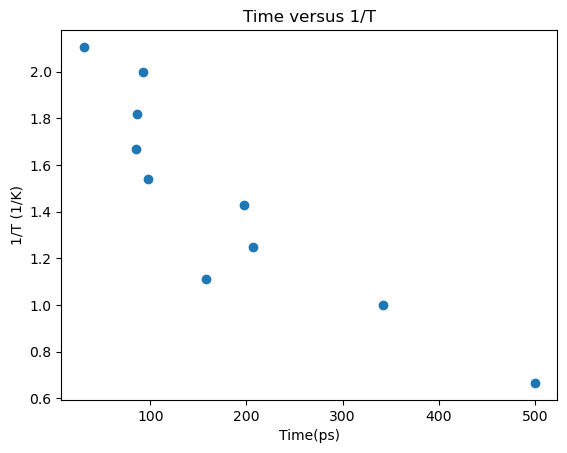

In [150]:
inverse_temp=[]
for item in Temp:
    inverse_temp+= [1/item]

plt.scatter(time_at_msd_equals_1,inverse_temp)
plt.xlabel('Time(ps)')
plt.ylabel('1/T (1/K)')
plt.title('Time versus 1/T')
plt.savefig('Figures/time_inversetemp.png')